In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
sub = pd.read_csv('subscribe.csv', delimiter=';', header=None)
sub.columns = ['date','action','user_id']
sub['date'] = pd.to_datetime(sub['date']).dt.date

In [5]:
sub

,date,action,user_id
0,2018-01-01,subscribe,2458151268
1,2018-01-01,subscribe,2458151267
2,2018-01-01,subscribe,2458151309
3,2018-01-01,subscribe,2458151358
4,2018-01-01,subscribe,2458151361
...,...,...,...
7613,2018-03-30,subscribe,2458272661
7614,2018-03-30,subscribe,2458258357
7615,2018-03-30,subscribe,2458338958
7616,2018-03-30,subscribe,2458339595


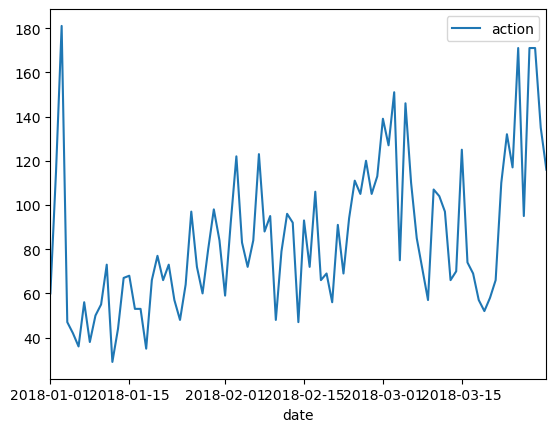

In [6]:
sub.groupby('date').count()[['action']].plot()

In [7]:
subsers = sub.groupby('date').count()[['action']]

In [8]:
okform = subsers.reset_index(drop = True).action

In [9]:
okform.tail

<bound method NDFrame.tail of 0      60
1     115
2     181
3      47
4      42
     ... 
84     95
85    171
86    171
87    135
88    116
Name: action, Length: 89, dtype: int64>

In [10]:
x = okform.index
y = okform.values

In [18]:
coefs = np.polyfit(x, y, 2)
predict = np.poly1d(coefs)

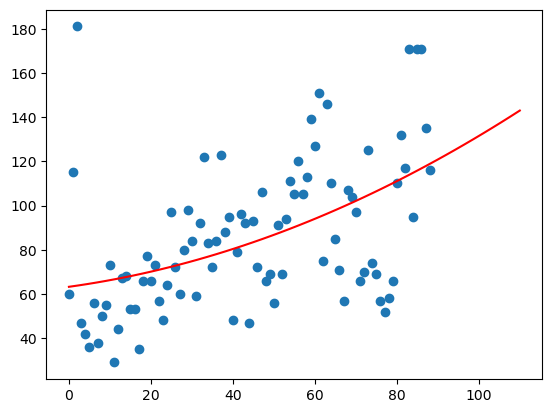

In [19]:
x_test = np.linspace(0, 110)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.24038642617786876